In [1]:
import utils_data as ut
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import net
from trainer import train
from transformers import BertForMaskedLM, BertTokenizer

In [2]:
CLASSES = {'POLYMER': 1,
           'ORGANIC': 2,
           'MONOMER': 3,
           'PROP_NAME': 4,
           'INORGANIC': 5,
           'MATERIAL_AMOUNT': 6,
           'POLYMER_FAMILY': 7,
           'PROP_VALUE': 8,
           'O': 0}
N_DATA = 5  # 0 is all
BATCH_SIZE = 5
SEED = 1421
MAX_LENGTH = 512
CLASS_WEIGHTS = [0.01, 0.5, 1, 1, 0.8, 1, 1, 1, 0.5]
LEARNING_RATE = 0.0001
N_EPOCHS = 5

In [3]:
ut.seed_everything(SEED)

In [4]:
tokenizerBERT = BertTokenizer.from_pretrained('pranav-s/MaterialsBERT', model_max_length=MAX_LENGTH)
modelBERT = BertForMaskedLM.from_pretrained('pranav-s/MaterialsBERT')
model = net.NERBERTModel(modelBERT.base_model, output_size=len(CLASSES)+1)

Epoch 1
Mean training loss: 2.3100
Mean training accuracy: 0.1264
Test accuracy: 0.2461


Epoch 2
Mean training loss: 1.8243
Mean training accuracy: 0.5055
Test accuracy: 0.2912


Epoch 3
Mean training loss: 1.4893
Mean training accuracy: 0.6868
Test accuracy: 0.3257


Epoch 4
Mean training loss: 1.1656
Mean training accuracy: 0.7747
Test accuracy: 0.3548


Epoch 5
Mean training loss: 0.8577
Mean training accuracy: 0.8846
Test accuracy: 0.3654




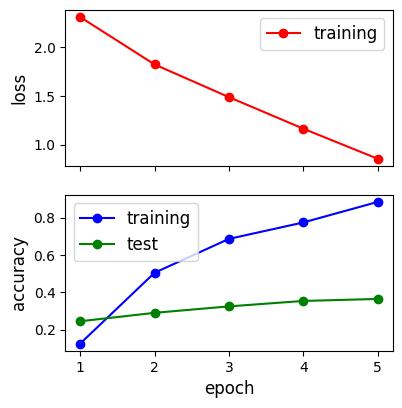

In [5]:
model, train_losses, train_accuracies, test_accuracies, pred_classes, true_classes, pred_all, true_all, data_list = train(model, tokenizerBERT, 
   'data/train.json', 'data/test.json', CLASSES, N_DATA, BATCH_SIZE, SEED, MAX_LENGTH, CLASS_WEIGHTS, LEARNING_RATE, N_EPOCHS, plot=True, save_model=True)

# Sanity check

In [6]:
sample_id = 14
start, end = 20, 50
print(CLASSES)
print()
print(f"Sample {sample_id}, Tokens {start} to {end}:")
print(f"{data_list[sample_id]['words'][start:end]}")
print()
print(f"True classes for Sample {sample_id}, Tokens {start} to {end}:")
print(true_all[sample_id, start:end])
print(f"Predicted classes for Sample {sample_id}, Tokens {start} to {end}:")
print(pred_all[sample_id, :, :].max(dim=0)[1][start:end])
print()


{'POLYMER': 1, 'ORGANIC': 2, 'MONOMER': 3, 'PROP_NAME': 4, 'INORGANIC': 5, 'MATERIAL_AMOUNT': 6, 'POLYMER_FAMILY': 7, 'PROP_VALUE': 8, 'O': 0}

Sample 14, Tokens 20 to 50:
['and', 'a', 'commercial', 'liquid', 'crystalline', 'polymer', ',', 'Rodrun', 'LC3000', '.', 'This', 'study', 'was', 'performed', 'for', 'blends', 'with', '10', ',', '20', 'and', '40', 'wt', '%', 'LCP', ',', 'processed', 'at', '220', 'and']

True classes for Sample 14, Tokens 20 to 50:
tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 6, 6, 6,
        0, 0, 0, 0, 0, 0])
Predicted classes for Sample 14, Tokens 20 to 50:
tensor([4, 4, 4, 4, 4, 4, 4, 3, 3, 8, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 4,
        3, 4, 4, 4, 4, 8])

